In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df=pd.read_csv("tips.csv")


In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
continous=['total_bill','tip']
discreate=['sex','smoker','day','time','size']

# Exploratory Data Analysis

In [21]:
#For continous variables
df[continous].describe() #df[['total_bill','tip']].describe()


,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


In [12]:
# for discreate data 
df.describe(include='object')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [16]:
df["smoker"].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [22]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [23]:
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [24]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [25]:
df['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

In [26]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# Plots for Continous data  


1. Univariate (single variable)
   
   - Histogram
   
   - Boxplot
   
2. Bivariate (plot between two variable)
 
    - Scatter plot
    
    - Line plot
    
    - Join plot
    
    - Violin plot
    
3. Multivariate analysis

     - pair plot
    
     - Heatmap
    

# Histogram/Distribution plot 

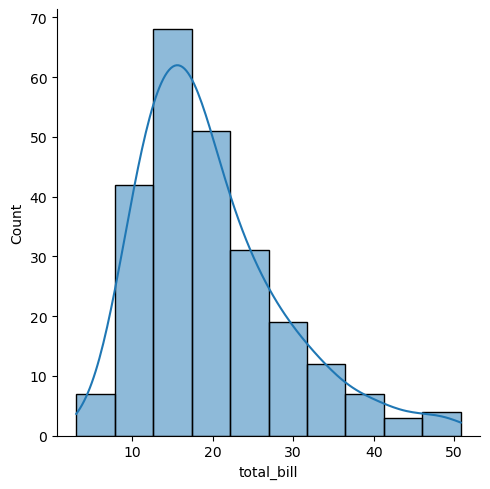

In [34]:
sns.displot(df['total_bill'],bins=10,kde=True)#kde- kernal density estimate
plt.show()


# Box plot

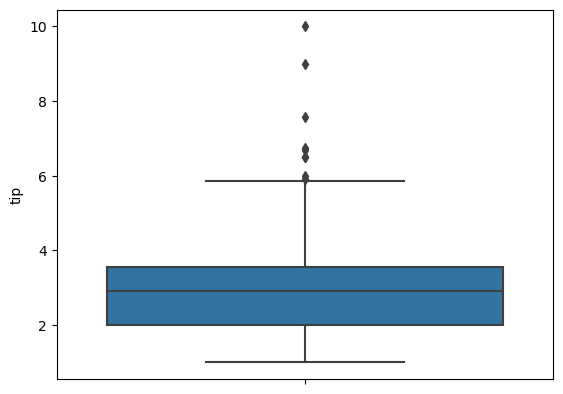

In [30]:
sns.boxplot(y=df['tip'])
plt.show()

# Satter plot

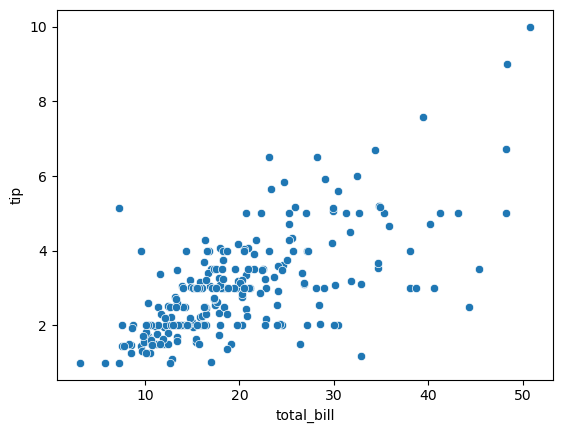

In [53]:
sns.scatterplot(x=df['total_bill'],y=df['tip'])
plt.show()

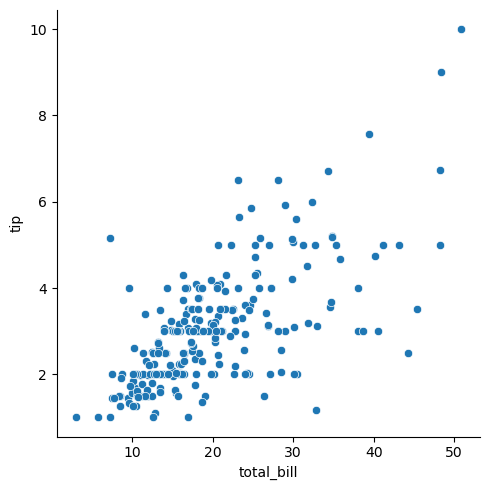

In [54]:
sns.relplot(x=df['total_bill'],y=df['tip'])
plt.show()

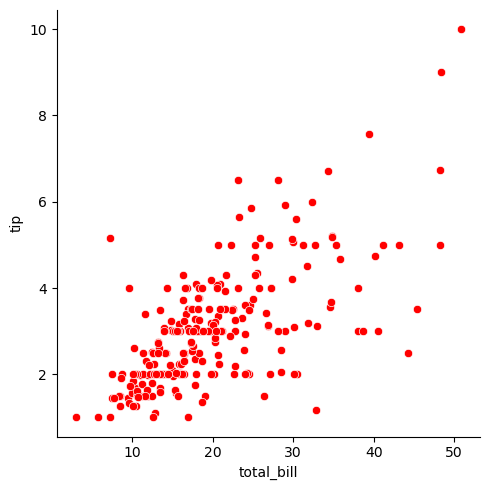

In [55]:
sns.relplot(x='total_bill',y='tip',data=df,color='red')
plt.show()


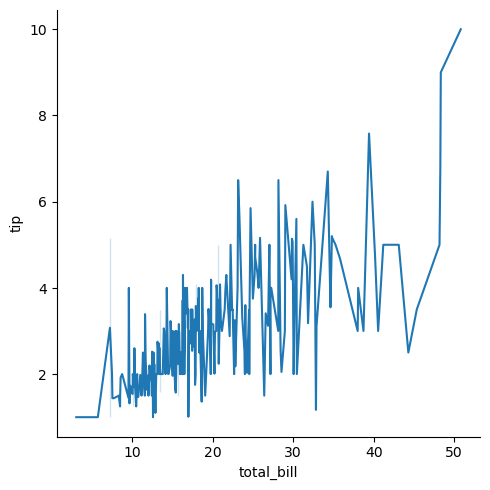

In [56]:
sns.relplot(x=df['total_bill'],y=df['tip'],kind='line')
plt.show()

# Data Seperation

1. style : seperate data with different marker.

2. hue  : seperate data with different color of marker. 

3. size :   seperate data point as different size.

* style, size, hue apply on discreate data only.

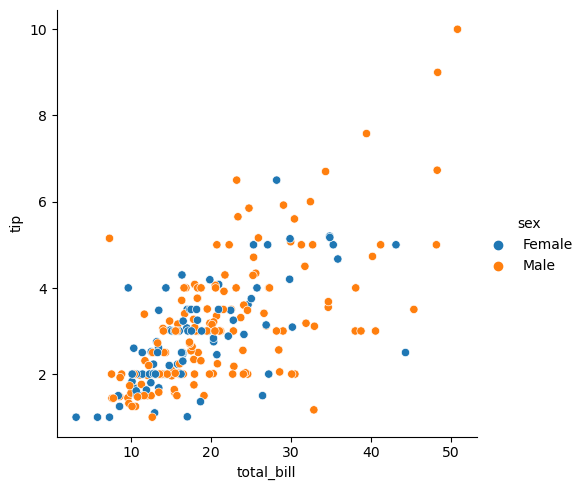

In [57]:
sns.relplot(x=df["total_bill"],y=df['tip'],data=df,hue='sex')
plt.show()

* sex is discreate data, here seperate data along with the sex who paid bill and tips.

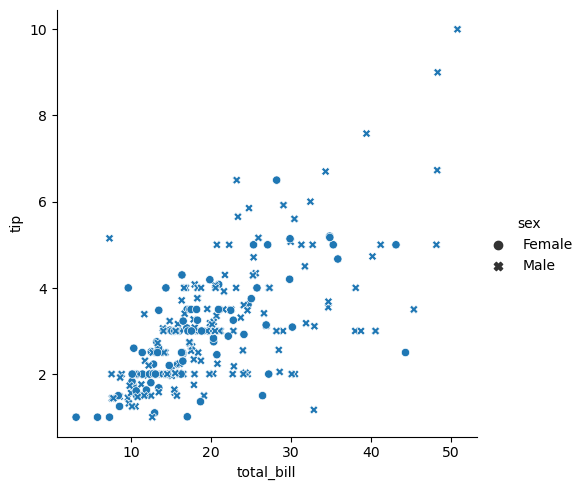

In [58]:
sns.relplot(x='total_bill',y='tip',data=df,style='sex')
plt.show()



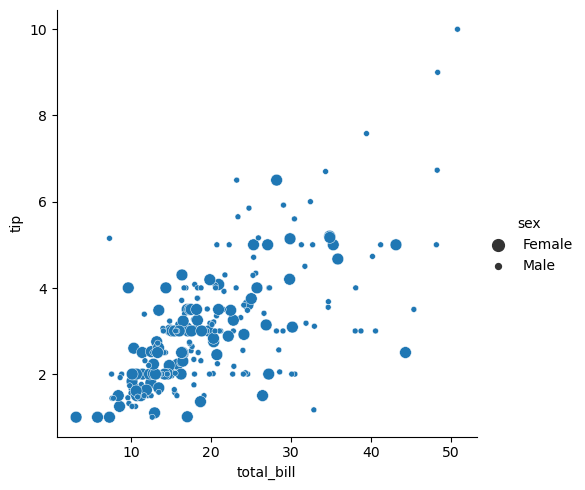

In [59]:
sns.relplot(x='total_bill',y='tip',data=df,size='sex')
plt.show()

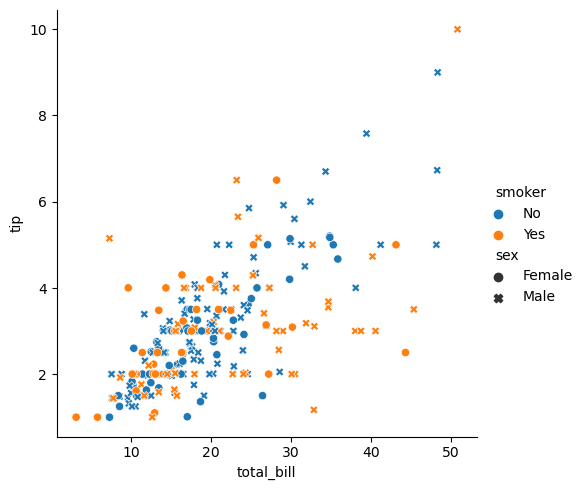

In [62]:
sns.relplot(x='total_bill',y='tip',data=df,style='sex',hue='smoker')
plt.show()

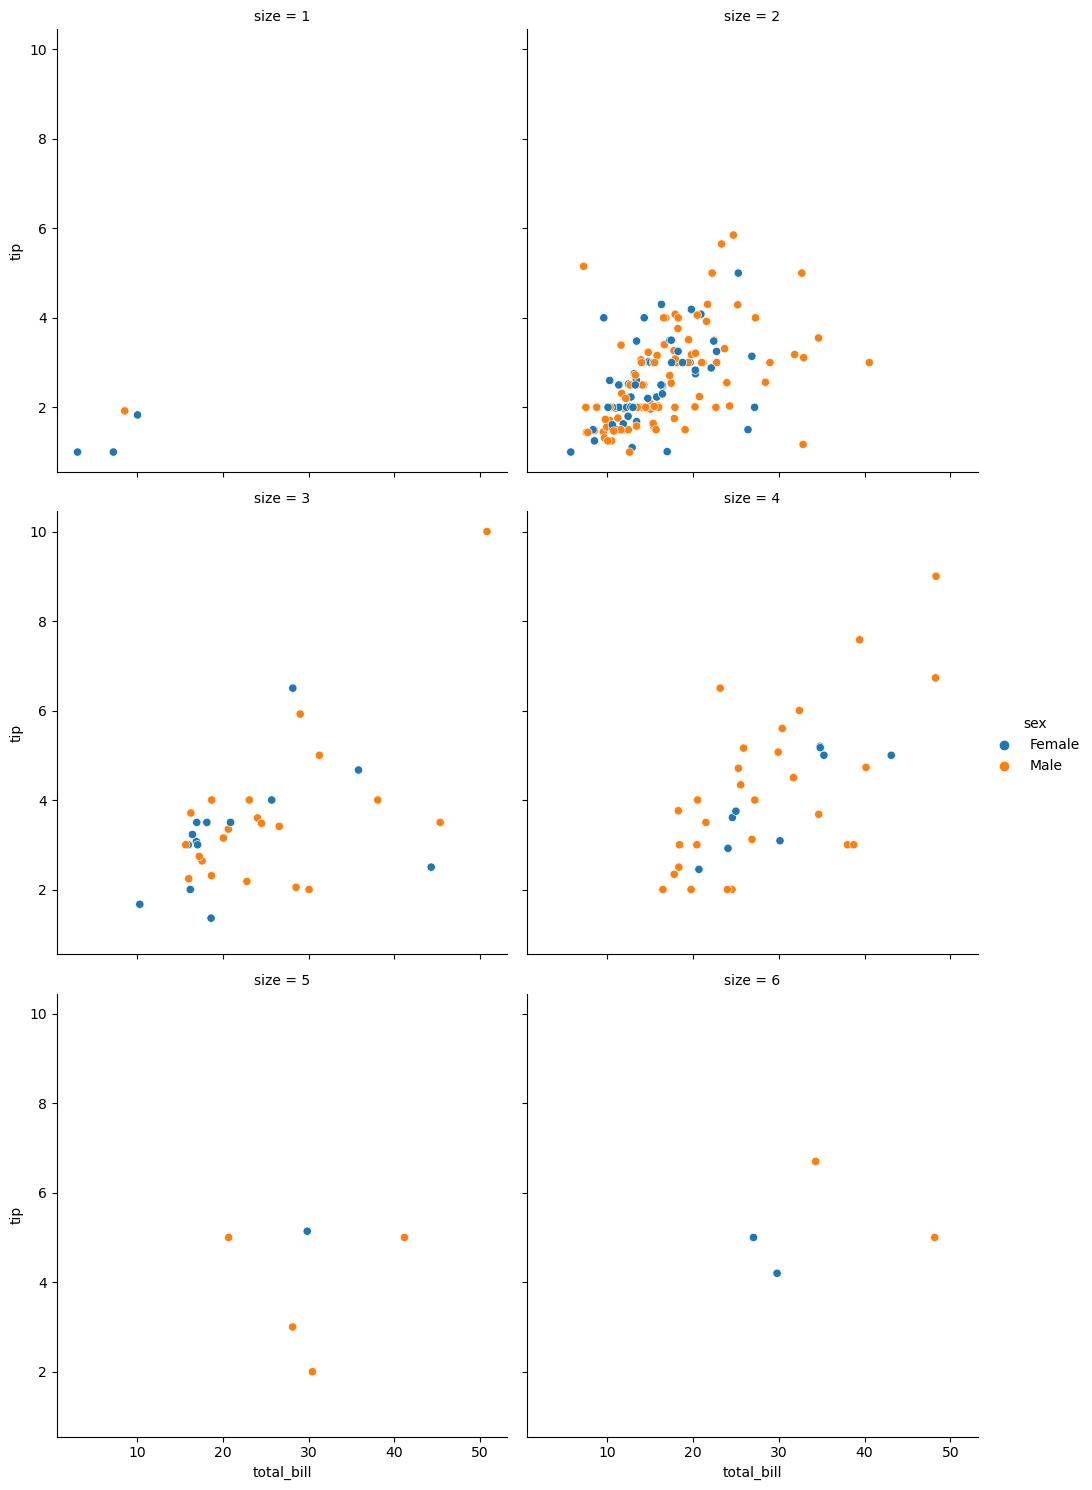

In [67]:
sns.relplot(x='total_bill',y='tip',data=df,hue='sex',col='size',col_wrap=2)
#col_wrap --> select how many graph want on single row.
#col-->select perticular column.
plt.show()

# Line Plot

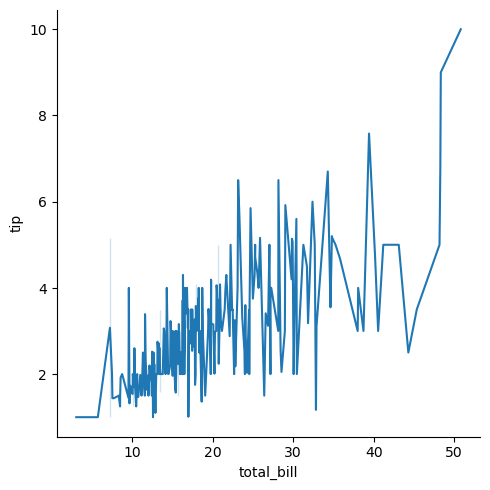

In [69]:
sns.relplot(x='total_bill',y='tip',data=df,kind='line')

In [71]:
df['sno']=pd.DataFrame(np.arange(1,245))

In [72]:
df

,total_bill,tip,sex,smoker,day,time,size,sno
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,2
2,21.01,3.50,Male,No,Sun,Dinner,3,3
3,23.68,3.31,Male,No,Sun,Dinner,2,4
4,24.59,3.61,Female,No,Sun,Dinner,4,5
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,240
240,27.18,2.00,Female,Yes,Sat,Dinner,2,241
241,22.67,2.00,Male,Yes,Sat,Dinner,2,242
242,17.82,1.75,Male,No,Sat,Dinner,2,243


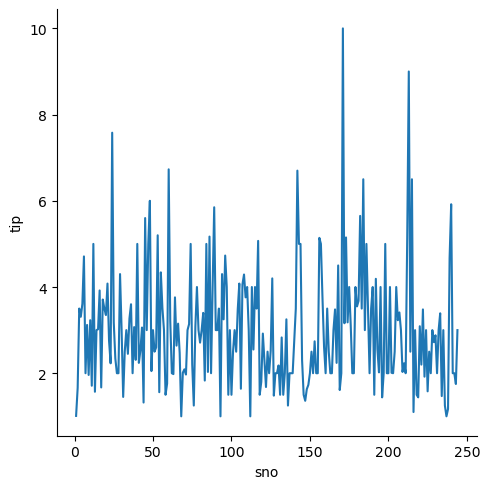

In [73]:
sns.relplot(x='sno',y='tip',kind='line',data=df)

In [74]:
df.drop("sno",axis=1,inplace=True)

# Joinplot

 A join plot allows to study relationship between 2 numeric variables.The central chart display their correlation. it is usually a scatterplot, a hexbin plot, a 2D histogram or a 2D density plot.

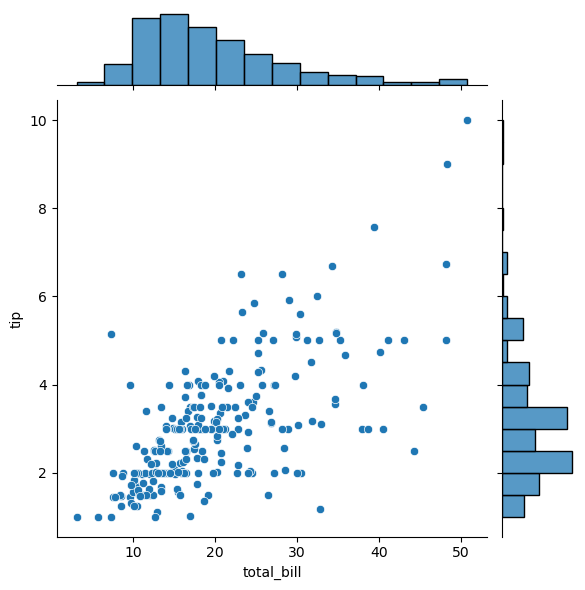

In [78]:
sns.jointplot(x='total_bill',y='tip',data=df)#correlation between 2 plot
plt.show()

# Violin plot

Vivolin plot helps us to see both the distribution of data in terms of kernal density estimation and the box plot.

<Axes: xlabel='total_bill', ylabel='day'>

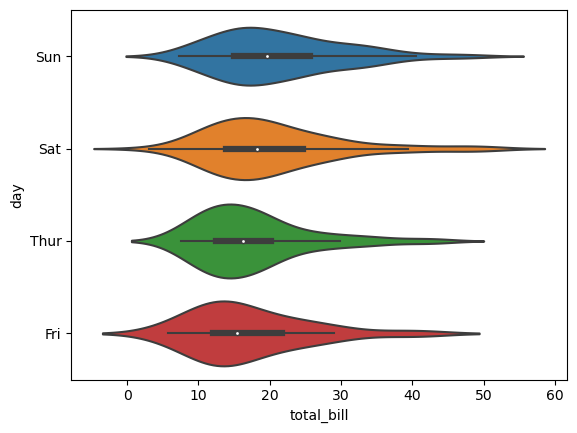

In [79]:
sns.violinplot(x='total_bill',y='day',data=df)

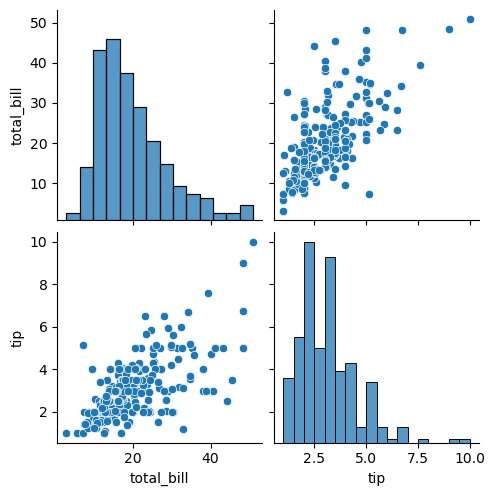

In [80]:
sns.pairplot(df,vars=continous)

# Heatmap (for correlation)

* A correlation heatmap uses colored cells to show a 2D correlation matrix(table) between two numeric dimensions.

* It is very important in feature selection

Correlation(r)=cov(x,y)/σxσy

In [84]:
c_m=df[["total_bill","tip"]].corr()
c_m

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


<Axes: >

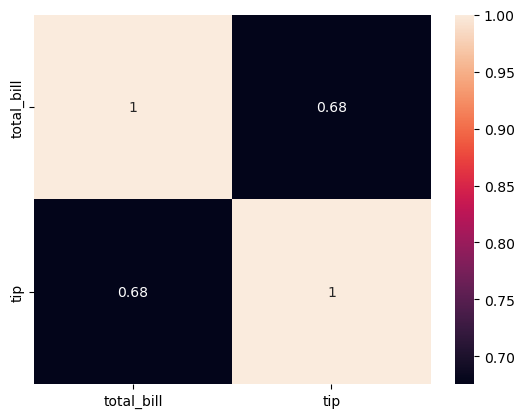

In [85]:
sns.heatmap(c_m,annot=True)

# plots for Discreate data

1. Univariate (single variable)

 * pie plot
 
 * Bar plot
    
 * Countplot

2. Bivariate (plot between two variables)

  * Boxplot-->One discreate variable & one continues variable

# CountPlot

In [88]:
df['smoker'].value_counts()


No     151
Yes     93
Name: smoker, dtype: int64

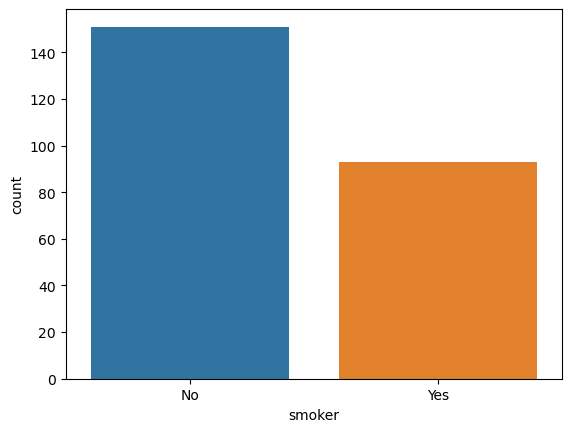

In [92]:
sns.countplot(x=df["smoker"])
plt.show()

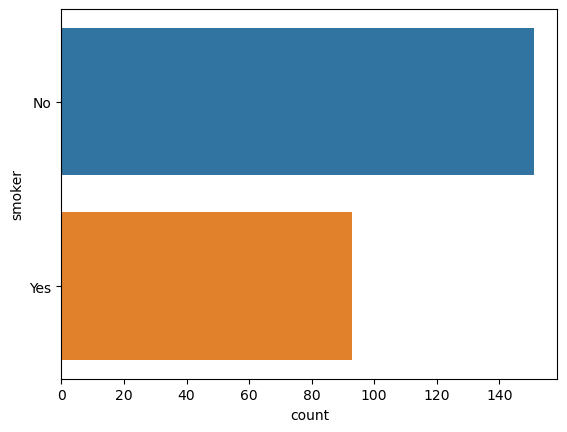

In [91]:
sns.countplot(y='smoker',data=df)
plt.show()

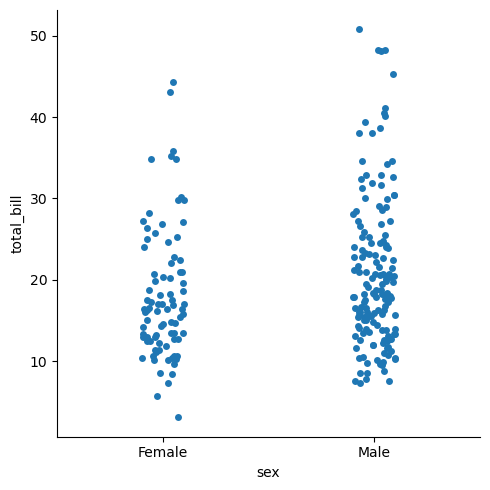

In [93]:
sns.catplot(x='sex',y='total_bill',data=df)
plt.show()

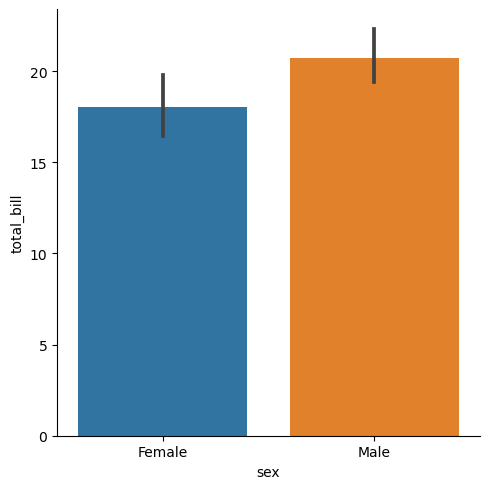

In [94]:
sns.catplot(x='sex',y='total_bill',data=df,kind='bar')

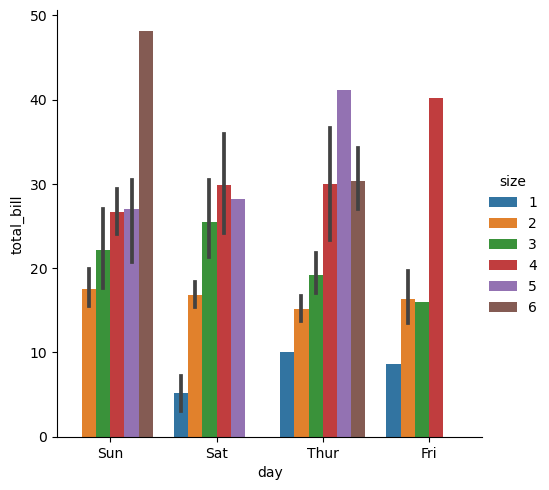

In [95]:
sns.catplot(x='day',y='total_bill',data=df,kind='bar',hue='size')

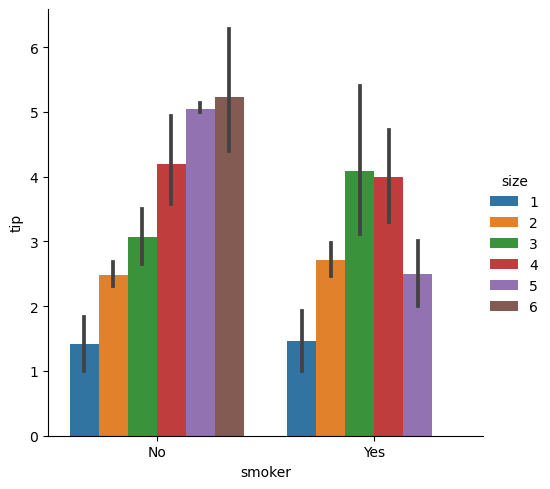

In [99]:
sns.catplot(x='smoker',y='tip',data=df,kind='bar',hue='size')  #multiple bar plot

# Boxplot

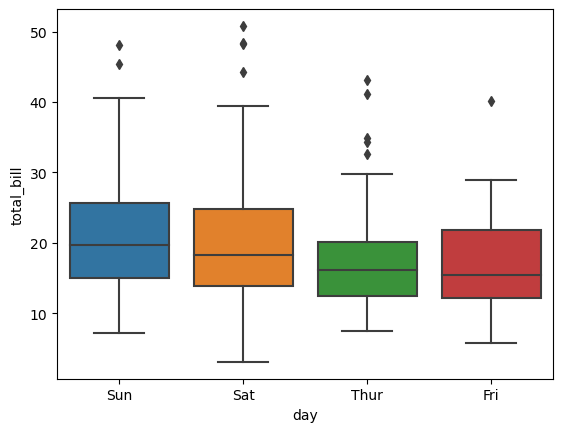

In [97]:
sns.boxplot(x='day',y='total_bill',data=df) #multiple boxplot
plt.show()

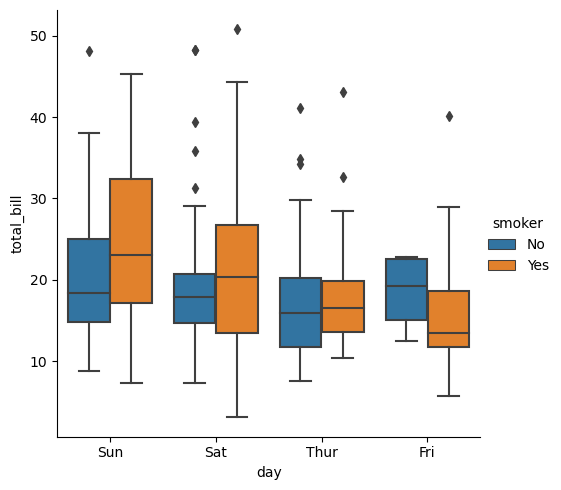

In [98]:
sns.catplot(x='day',y='total_bill',hue='smoker',data=df,kind='box')